In [2]:
from pathlib import Path
import sys

# make the project root importable (parent of the notebooks folder)
root = Path().resolve().parent
if str(root) not in sys.path:
    sys.path.insert(0, str(root))

from ucimlrepo import fetch_ucirepo

# fetch dataset 
iris = fetch_ucirepo(id=53)
  
# data (as pandas dataframes) 
X = iris.data.features
y = iris.data.targets

# variable information 
print(iris.variables)

           name     role         type demographic  \
0  sepal length  Feature   Continuous        None   
1   sepal width  Feature   Continuous        None   
2  petal length  Feature   Continuous        None   
3   petal width  Feature   Continuous        None   
4         class   Target  Categorical        None   

                                         description units missing_values  
0                                               None    cm             no  
1                                               None    cm             no  
2                                               None    cm             no  
3                                               None    cm             no  
4  class of iris plant: Iris Setosa, Iris Versico...  None             no  


In [3]:
print(y.iloc[45:55])

              class
45      Iris-setosa
46      Iris-setosa
47      Iris-setosa
48      Iris-setosa
49      Iris-setosa
50  Iris-versicolor
51  Iris-versicolor
52  Iris-versicolor
53  Iris-versicolor
54  Iris-versicolor


In [4]:
print(y.iloc[95:105])

               class
95   Iris-versicolor
96   Iris-versicolor
97   Iris-versicolor
98   Iris-versicolor
99   Iris-versicolor
100   Iris-virginica
101   Iris-virginica
102   Iris-virginica
103   Iris-virginica
104   Iris-virginica


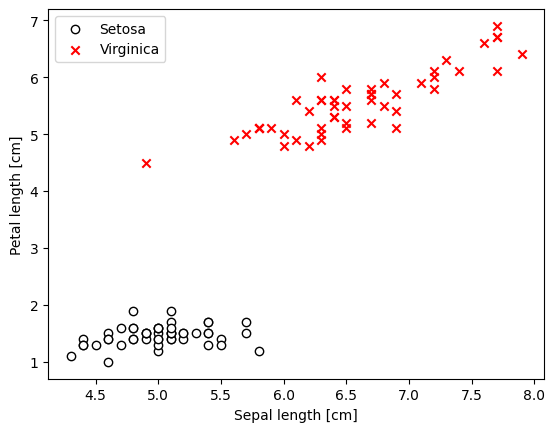

In [5]:
import numpy as np

ind = np.r_[0:50, 100:150]

y = y.iloc[ind].values
y = np.where(y == 'Iris-setosa', 1, 0)

X = X.iloc[ind, [0, 2]].values

import matplotlib.pyplot as plt

plt.scatter(X[:50, 0], X[:50, 1], color='white', edgecolor='black', marker='o', label='Setosa')
plt.scatter(X[50:100, 0], X[50:100, 1], color='red', marker='x', label='Virginica')
plt.xlabel('Sepal length [cm]')
plt.ylabel('Petal length [cm]')
plt.legend(loc='upper left')
plt.show()

Perceptron.fit() --> Time elapsed: 15.858173370361328 milliseconds


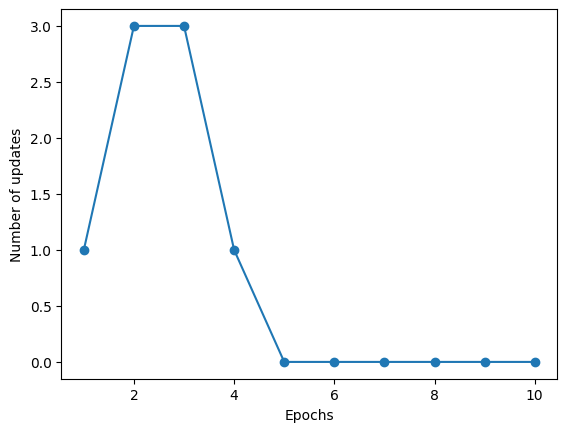

In [6]:
from perceptron import Perceptron
import time

ppn = Perceptron(eta=0.1, n_iter=10)

start = time.time()
ppn.fit(X, y)
end = time.time()

print('Perceptron.fit() --> Time elapsed:', (end - start) * 1000, 'milliseconds')

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()

Perceptron.fit_break() --> Time elapsed: 11.763811111450195 milliseconds


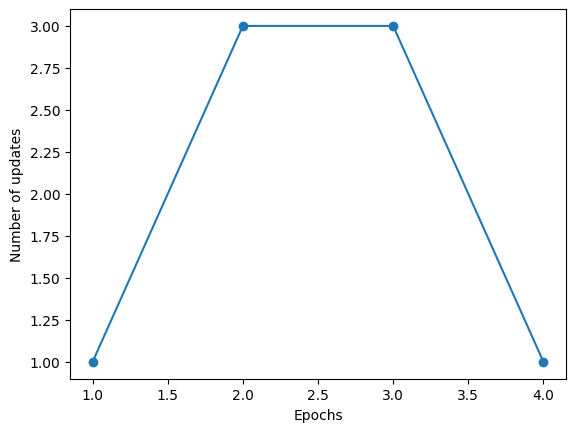

In [7]:
ppn = Perceptron(eta=0.1, n_iter=10)

start = time.time()
ppn.fit_break(X, y)
end = time.time()

print('Perceptron.fit_break() --> Time elapsed:', (end - start) * 1000, 'milliseconds')

plt.plot(range(1, len(ppn.errors_) + 1), ppn.errors_, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Number of updates')

plt.show()